In [83]:
import math
import json
import numpy as np
from collections import Counter
import pandas as pd
import random
from random import shuffle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import svm
from numpy import linalg 
from sklearn.model_selection import GridSearchCV 
from random import randint

# Data preprocess

In [84]:
import json
with open('../datas/bbc_preprocessed.json') as f:
    datas = json.load(f)

In [213]:
cate = [data['category'] for data in datas]
mp = {'Technology':0,'Entertainment & Arts':1,'Business':2,'Health':3,'Science & Environment':4}
inv_mp = {v:k for k,v in mp.items()}
cat = [mp[x] for x in cate]
cont = [' '.join(data['content']) for data in datas]

X = cont
y = cat

In [171]:
Counter(y)

Counter({0: 4658, 1: 2868, 2: 6510, 3: 790, 4: 1137})

## Devide into train/valid/test set

In [86]:
import random

indexes = range(0, len(X))
random.seed(5220)
part1_index = sorted(random.sample(indexes, len(X)//2))
part2_index = [i for i in indexes if i not in part1_index]

X1 = [X[i] for i in part1_index]
y1 = [y[i] for i in part1_index]
X2 = [X[i] for i in part2_index]
y2 = [y[i] for i in part2_index]

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X1, y1, test_size=0.4, random_state=5220)

In [88]:
from collections import Counter
print(Counter(y_train))
print([v/len(y_train) for k,v in Counter(y_train).items()])
print(Counter(y_valid))
print([v/len(y_valid) for k,v in Counter(y_valid).items()])

Counter({2: 1941, 0: 1421, 1: 872, 4: 327, 3: 227})
[0.1821219715956558, 0.29678362573099415, 0.40538847117794485, 0.04741019214703425, 0.06829573934837092]
Counter({2: 1262, 0: 960, 1: 591, 4: 209, 3: 171})
[0.39523958659567804, 0.30065768869401815, 0.18509238960225494, 0.05355465079862198, 0.06545568430942687]


# Calculate tfidf

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf(train_articles, valid_articles):
    vectorizer = TfidfVectorizer(sublinear_tf = True, max_df=0.5, min_df = 5)
    train_features = vectorizer.fit_transform(train_articles)
    valid_features = vectorizer.transform(valid_articles)
    return train_features.todense(), valid_features.todense(), vectorizer

X_train_tfidf, X_valid_tfidf, tfidfVect = tfidf(X_train, X_valid)
X_tfidf, _, _ = tfidf(cont, cont)

In [184]:
tmp = X_train_tfidf[0:,1]

# Graph with tsne

## Use PCA to reduce dimension

In [274]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
from ggplot import *

def get_tsne_results(X_tfidf):
    pca = PCA(n_components = 50, random_state = 5220)
    pca.fit(X_tfidf)
    visual = np.matrix(pca.transform(X_tfidf))
    print("Visual get")
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state = 5220)
    tsne_results = tsne.fit_transform(visual)
    print("tsne_result get")
    return tsne_results

def get_df_tsne(tsne_results, y):
    y = [inv_mp[i] for i in y]
    df_tsne = {}
    df_tsne['x-tsne'] = tsne_results[:,0]
    df_tsne['y-tsne'] = tsne_results[:,1]
    df_tsne['label'] = [str(i) for i in y]
    df_tsne = pd.DataFrame(df_tsne)
    return df_tsne

def plot_df_tsne(df_tsne, title="tSNE dimensions colored by digit"):
    chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) +\
    geom_point(size=20,alpha=1) + \
    theme(plot_title = element_text(size=30, text=title),\
         axis_title_x = element_text(size=30, text='x-pca-tsne'),\
         axis_title_y = element_text(size=30, text='y-pca-tsne'))
    return chart

In [223]:
tsne_results_valid = get_tsne_results(X_valid_tfidf)
df_tsne_valid = get_df_tsne(tsne_results_valid, y_valid)

Visual get
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3193 samples in 0.009s...
[t-SNE] Computed neighbors for 3193 samples in 1.055s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3193
[t-SNE] Computed conditional probabilities for sample 2000 / 3193
[t-SNE] Computed conditional probabilities for sample 3000 / 3193
[t-SNE] Computed conditional probabilities for sample 3193 / 3193
[t-SNE] Mean sigma: 0.127466
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.436150
[t-SNE] Error after 300 iterations: 1.541369
tsne_result get


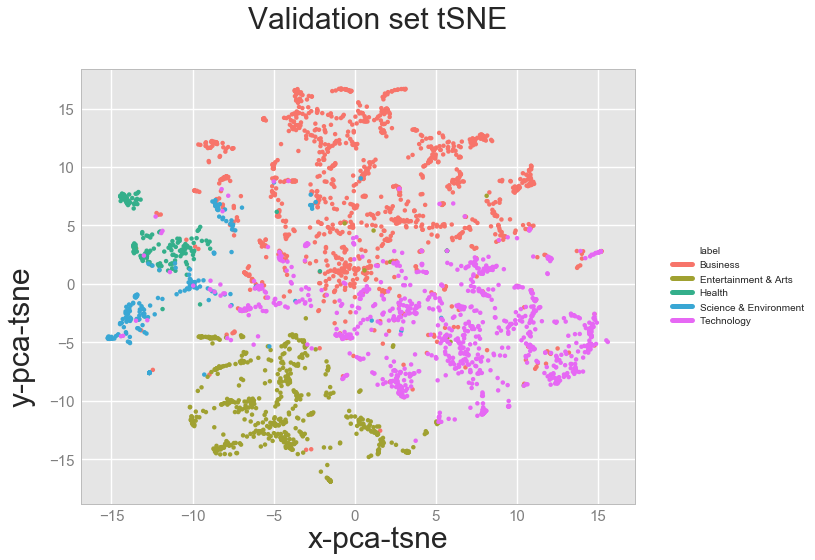

<ggplot: (141351173629)>

In [275]:
plot_df_tsne(df_tsne_valid, "Validation set tSNE")

In [7]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components = 50)
pca.fit(X_tfidf)
visual = np.matrix(pca.transform(X_tfidf))

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(visual)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 15963 samples in 1.313s...
[t-SNE] Computed neighbors for 15963 samples in 39.343s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15963
[t-SNE] Computed conditional probabilities for sample 2000 / 15963
[t-SNE] Computed conditional probabilities for sample 3000 / 15963
[t-SNE] Computed conditional probabilities for sample 4000 / 15963
[t-SNE] Computed conditional probabilities for sample 5000 / 15963
[t-SNE] Computed conditional probabilities for sample 6000 / 15963
[t-SNE] Computed conditional probabilities for sample 7000 / 15963
[t-SNE] Computed conditional probabilities for sample 8000 / 15963
[t-SNE] Computed conditional probabilities for sample 9000 / 15963
[t-SNE] Computed conditional probabilities for sample 10000 / 15963
[t-SNE] Computed conditional probabilities for sample 11000 / 15963
[t-SNE] Computed conditional probabilities for sample 12000 / 15963
[t-SNE] Computed conditional probabilities for s

C:\Users\Moo\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\Moo\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\Moo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


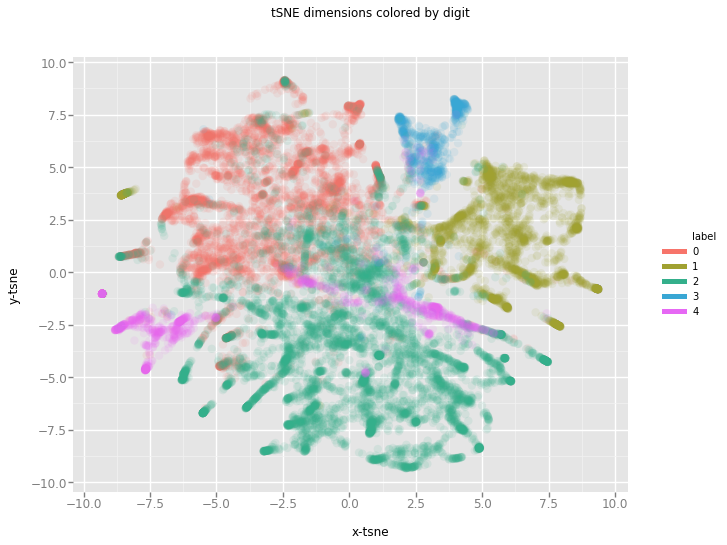

<ggplot: (129118395449)>

In [9]:
from ggplot import *

df_tsne = {}
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne['label'] = [str(i) for i in y]

df_tsne = pd.DataFrame(df_tsne)
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) +\
    geom_point(size=70,alpha=0.1) + \
    ggtitle("tSNE dimensions colored by digit")
        
chart

# Model Results

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

def ShowBeautyConfusionMatrix(true, predict, title):
    cm_pd = pd.DataFrame(confusion_matrix(true, predict))
    sns.set(font_scale=1.5)
    sns.heatmap(cm_pd, annot = True, fmt='d', cmap='Blues')
    plt.title(title+"\nAccuracy:{0:3f}".format(accuracy_score(true, predict)))
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.savefig(title)
    plt.show()

In [90]:
vocab = tfidfVect.vocabulary_
rev_vocab = {v:k for k,v in vocab.items()}
rev_mp = {v:k for k,v in mp.items()}

def get_topN_coef(coef, N, order=True):
    res = {}
    for i in range(len(coef)):
        co = coef[i]
        if order:
            indexes = co.argsort()[::-1][:N]
            words = [rev_vocab[i] for i in indexes]
            coefs = sorted(co)[::-1][:N]
        else:
            indexes = co.argsort()[:N][::-1]
            words = [rev_vocab[i] for i in indexes]
            coefs = sorted(co)[:N][::-1]
        res[rev_mp[i]] = list(zip(words, coefs))
    return res

## Naive Bayes

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

nb_clf = MultinomialNB()

In [92]:
nb_clf.fit(X_train_tfidf, y_train)
nb_valid_predicts = nb_clf.predict(X_valid_tfidf)

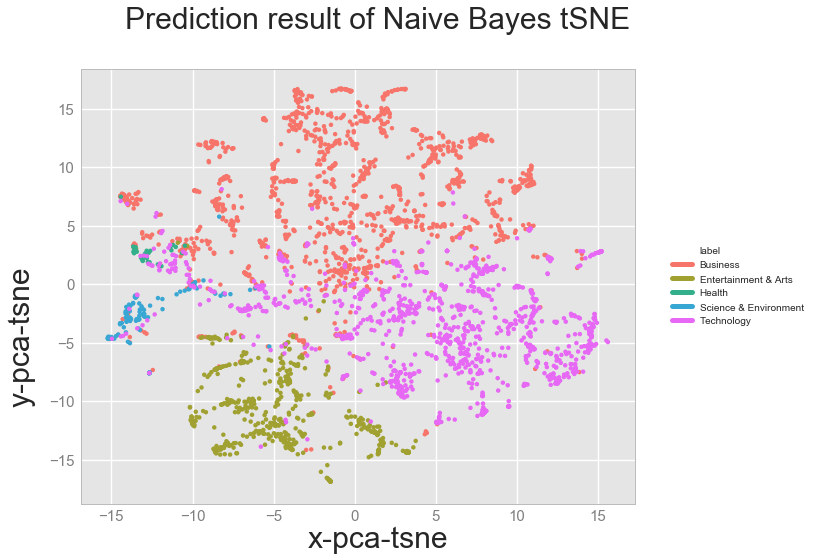

<ggplot: (141351186717)>

In [276]:
df_tsne_valid_nb = get_df_tsne(tsne_results_valid, nb_valid_predicts)
plot_df_tsne(df_tsne_valid_nb, "Prediction result of Naive Bayes tSNE")

In [93]:
from sklearn.metrics import confusion_matrix

nb_cm = confusion_matrix(y_valid, nb_valid_predicts)
nb_cm

array([[ 891,    4,   62,    0,    3],
       [  25,  523,   43,    0,    0],
       [ 113,    7, 1140,    1,    1],
       [  34,    2,   99,   35,    1],
       [  31,    1,   58,    0,  119]], dtype=int64)

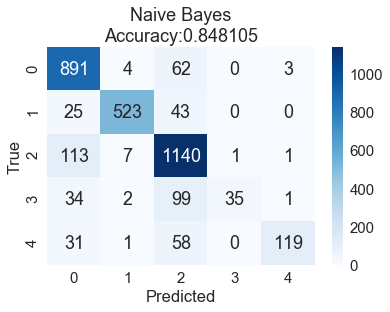

In [94]:
ShowBeautyConfusionMatrix(y_valid, nb_valid_predicts, "Naive Bayes")

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, nb_valid_predicts, digits=3))

             precision    recall  f1-score   support

          0      0.814     0.928     0.868       960
          1      0.974     0.885     0.927       591
          2      0.813     0.903     0.856      1262
          3      0.972     0.205     0.338       171
          4      0.960     0.569     0.715       209

avg / total      0.861     0.848     0.836      3193



In [168]:
get_topN_coef((nb_clf.feature_log_prob_), 10)

{'Business': [('bank', -6.1709459411915963),
  ('compani', -6.3189764482515036),
  ('busi', -6.3198407186387602),
  ('market', -6.3297230065122969),
  ('growth', -6.3883344725902536),
  ('mr', -6.4294454797539986),
  ('price', -6.4514791993137717),
  ('economi', -6.4663524820373102),
  ('uk', -6.5039952410694983),
  ('rate', -6.5143881746273316)],
 'Entertainment & Arts': [('film', -6.0720909390483504),
  ('star', -6.2653340304738983),
  ('award', -6.515327245096195),
  ('actor', -6.6948980613417763),
  ('play', -6.7018590131086428),
  ('show', -6.7543915514550932),
  ('music', -6.7685540279531704),
  ('bbc', -6.8557627480297612),
  ('drama', -6.860030994078663),
  ('seri', -6.9255182132517188)],
 'Health': [('patient', -6.5614855881411458),
  ('nh', -6.5992603446790969),
  ('health', -6.7815738428197996),
  ('hospit', -6.9406461047816723),
  ('cancer', -6.9443571873756849),
  ('care', -7.0032407204390097),
  ('treatment', -7.0278221230533848),
  ('diseas', -7.1097944451717066),
  ('re

## SVM

In [133]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier

svm_clf = SGDClassifier(tol=1e-3, random_state = 5566)

In [134]:
svm_clf.fit(X_train_tfidf, y_train)
svm_valid_predicts = svm_clf.predict(X_valid_tfidf)

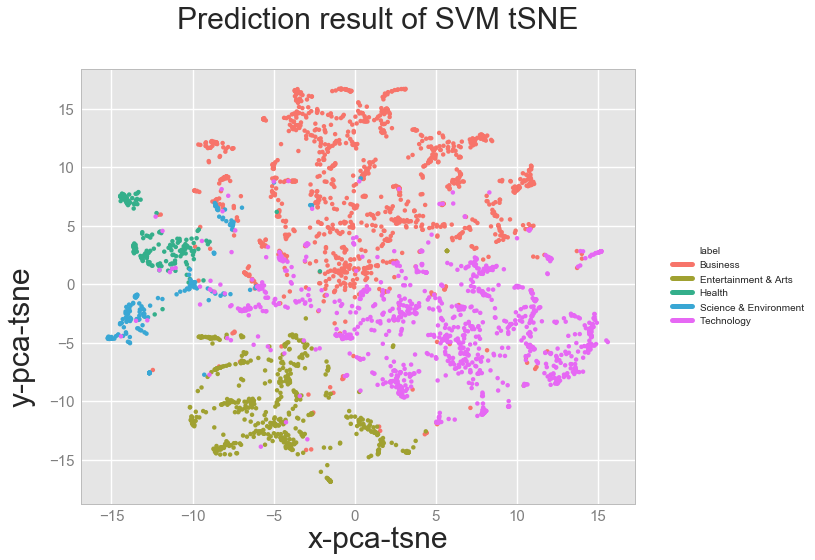

<ggplot: (-9223371895503546424)>

In [277]:
df_tsne_valid_svm = get_df_tsne(tsne_results_valid, svm_valid_predicts)
plot_df_tsne(df_tsne_valid_svm, "Prediction result of SVM tSNE")

In [135]:
from sklearn.metrics import confusion_matrix

svm_cm = confusion_matrix(y_valid, svm_valid_predicts)
svm_cm

array([[ 915,    4,   35,    2,    4],
       [  16,  558,   16,    1,    0],
       [  90,    3, 1160,    4,    5],
       [   3,    1,    2,  165,    0],
       [  11,    2,   11,    7,  178]], dtype=int64)

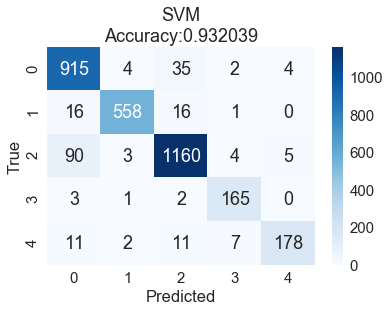

In [136]:
ShowBeautyConfusionMatrix(y_valid, svm_valid_predicts, "SVM")

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, svm_valid_predicts, digits=3))

             precision    recall  f1-score   support

          0      0.884     0.953     0.917       960
          1      0.982     0.944     0.963       591
          2      0.948     0.919     0.933      1262
          3      0.922     0.965     0.943       171
          4      0.952     0.852     0.899       209

avg / total      0.934     0.932     0.932      3193



### Top N Coefficients

In [120]:
get_topN_coef(svm_clf.coef_, 10)

{'Business': [('bank', 3.8308265072895411),
  ('busi', 3.6123981719909528),
  ('compani', 2.9251202151950864),
  ('tradit', 2.5586386353536046),
  ('mr', 2.2778473639594399),
  ('manag', 2.2295633029872857),
  ('economi', 2.1207189206932453),
  ('global', 2.1015032431073704),
  ('giant', 2.0893623454499473),
  ('econom', 1.947538630499797)],
 'Entertainment & Arts': [('art', 2.6125931623022494),
  ('film', 2.6049461070998556),
  ('star', 2.2883400128786016),
  ('theatr', 1.9534676827518052),
  ('bbc', 1.9135451089323228),
  ('festiv', 1.8955489834607402),
  ('album', 1.8252346638344936),
  ('singer', 1.7637840915973035),
  ('artist', 1.7434350355891612),
  ('hollywood', 1.703851144218435)],
 'Health': [('nh', 3.0583636946865673),
  ('care', 2.42903380000338),
  ('health', 2.2081802256734662),
  ('cancer', 2.0958126230471499),
  ('patient', 2.0794519250517274),
  ('infect', 1.9016215861188392),
  ('hospit', 1.8817855202369638),
  ('treatment', 1.8693823121872848),
  ('brain', 1.62635268

In [121]:
get_topN_coef(svm_clf.coef_, 10, False)

{'Business': [('site', -1.7883743171818964),
  ('news', -1.7950213192037923),
  ('huge', -1.7965174388989804),
  ('dave', -1.8083260963556451),
  ('climat', -1.9126863008179456),
  ('ad', -2.0017247835735046),
  ('told', -2.0173303210893141),
  ('releas', -2.0382740406724591),
  ('nh', -2.137414936467704),
  ('bbc', -2.73934762300334)],
 'Entertainment & Arts': [('custom', -1.2014942346275701),
  ('nh', -1.2872237970730596),
  ('user', -1.3629188921780429),
  ('develop', -1.4638251063500261),
  ('firm', -1.4767217662600436),
  ('game', -1.4810492267445527),
  ('bank', -1.5065848435934457),
  ('compani', -1.8226814715564243),
  ('busi', -1.9321992901444143),
  ('mr', -1.9612816205087185)],
 'Health': [('mr', -0.81362616391319886),
  ('insur', -0.81573682767881883),
  ('firm', -0.86504608796944016),
  ('technolog', -0.87136432132371944),
  ('million', -0.89493038774367251),
  ('app', -0.91306680515532768),
  ('googl', -1.0164914170535393),
  ('compani', -1.0419435766746423),
  ('machin',

## Softmax Regression

In [127]:
#Convert category
def yconvert(y,num):
    Y = np.zeros((len(y),num))
    for i in range(len(y)):
        Y[i,y[i]] = 1
    return np.matrix(Y)

#Softmax function
def softmax(x):
    sm = (np.exp(x)/np.sum(np.exp(x),axis = 1))
    return np.matrix(sm)

#Cross-entropy loss fucntion
def cross_entropy(prob, y, lam,w):
    loss = -np.sum(np.multiply(np.log(prob), y)) +  lam*np.sum(abs(w))
    return loss

#Batch gradient descent
def batch_gradient(x, y, prob, lam, w):
    grad = -np.dot(x.T, (y - prob)) + lam*abs(w)
    return grad

#Mini Batch gradient descent
def mini_batch(x, y, prob, lam, w, i, j):
    grad = -np.dot(x[i:j,].T, (y[i:j,] - prob[i:j,])) + lam*abs(w)
    return grad

#prediction
def prediction(x,w):
    probs = softmax(np.dot(x,w))
    preds = np.argmax(probs, axis = 1)
    return preds

#correct rate
def rate(x,w,y):
    pred = prediction(x,w)
    return np.sum(pred.T == y)/len(y)

#Main caculation function
def main(xtrain, ytrain, xvalid, yvalid, lam, alpha, e):
    w = np.matrix(np.zeros((xtrain.shape[1],5)))
    loss = 0
    r = []
    n = xtrain.shape[0]
    y = yconvert(ytrain, 5)
    j = 0
    size = len(xtrain)//5
    for i in range(1000):
        
        prob = softmax(xtrain * w)
            
        loss0 = loss
        
        loss = (1/n) * cross_entropy(prob, y, lam, w)
        
        grad = (1/size) * mini_batch(xtrain, y, prob, lam, w, j, j + size)
        
        j = (j + size)%(n-size)
        
        w = w - (alpha * grad) 
        
        if(abs(loss0-loss) < e):
            break
        #print((j,j+size))
        #print(abs(loss0-loss),e)
        #r.append(rate(xvalid, w, yvalid))
    return rate(xvalid, w, yvalid), prediction(xvalid, w), w

In [128]:
sf_rate, sf_valid_predicts, sf_coef = main(X_train_tfidf, y_train, X_valid_tfidf, y_valid,  0, 460, 0.005)

In [249]:
sf_valid_predicts_tmp = [x[0,0] for x in sf_valid_predicts]

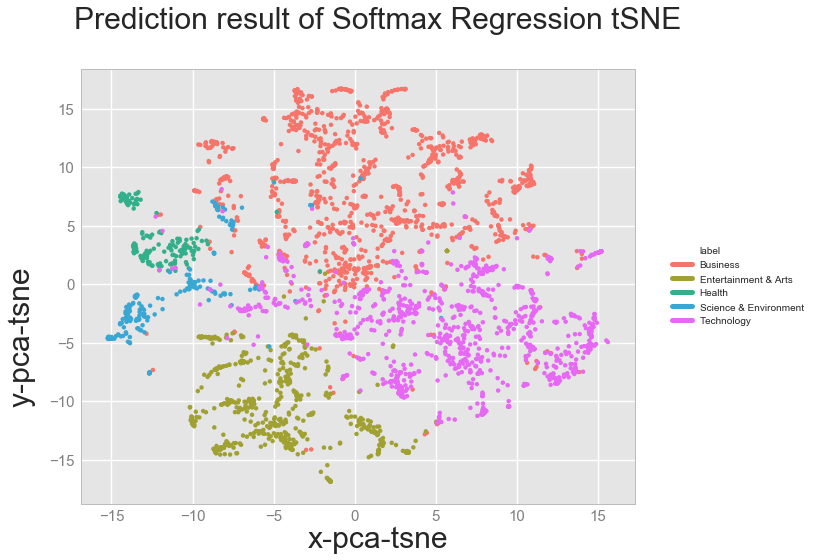

<ggplot: (-9223371895503014747)>

In [278]:
df_tsne_valid_sf = get_df_tsne(tsne_results_valid, sf_valid_predicts_tmp)
plot_df_tsne(df_tsne_valid_sf, "Prediction result of Softmax Regression tSNE")

In [129]:
from sklearn.metrics import confusion_matrix

sf_cm = confusion_matrix(y_valid, sf_valid_predicts)
sf_cm

array([[ 893,    6,   46,    2,   13],
       [   4,  575,   11,    1,    0],
       [  86,   10, 1156,    5,    5],
       [   2,    2,    3,  162,    2],
       [   5,    2,   11,    3,  188]], dtype=int64)

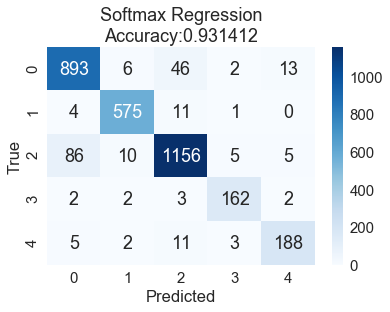

In [130]:
ShowBeautyConfusionMatrix(y_valid, sf_valid_predicts, "Softmax Regression")

In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, sf_valid_predicts, digits=3))

             precision    recall  f1-score   support

          0      0.902     0.930     0.916       960
          1      0.966     0.973     0.970       591
          2      0.942     0.916     0.929      1262
          3      0.936     0.947     0.942       171
          4      0.904     0.900     0.902       209

avg / total      0.932     0.931     0.931      3193



In [132]:
get_topN_coef(np.transpose(np.array(sf_coef)), 10)

{'Business': [('bank', 8.9347433137131951),
  ('busi', 8.4673583877168852),
  ('compani', 6.3964628683793139),
  ('profit', 5.2075354742372308),
  ('economi', 4.8711024724468714),
  ('growth', 4.8259103446384497),
  ('market', 4.803767471732896),
  ('custom', 4.6221076744221037),
  ('chief', 4.4502449437378448),
  ('financi', 4.2910191939800448)],
 'Entertainment & Arts': [('film', 6.4929348701119247),
  ('star', 5.3080809538626088),
  ('music', 3.7231943703816035),
  ('art', 3.6157673062311324),
  ('album', 3.5045335125510562),
  ('actor', 3.4862424255029234),
  ('award', 3.3252931958345133),
  ('festiv', 3.1726131388701848),
  ('artist', 3.1542187467129783),
  ('theatr', 3.0561275557532781)],
 'Health': [('nh', 5.6760594432458698),
  ('patient', 5.090150871182515),
  ('health', 4.5445249470002311),
  ('care', 4.1167077800854806),
  ('hospit', 3.7796492651999438),
  ('treatment', 3.4734814095409683),
  ('cancer', 3.071036949865686),
  ('diseas', 2.8995276266006091),
  ('medic', 2.7486

In [109]:
get_topN_coef(np.transpose(np.array(sf_coef)), 10, False)

{'Business': [('scientist', -2.475712845431735),
  ('care', -2.5013538660300974),
  ('game', -2.5054382229165251),
  ('twitter', -2.5114340173456124),
  ('research', -2.6134056545684525),
  ('told', -2.8125510801168052),
  ('film', -2.8183233307301112),
  ('nh', -3.0498732982035599),
  ('releas', -3.435318064393686),
  ('bbc', -4.1377702610179474)],
 'Entertainment & Arts': [('technolog', -1.5547989037742564),
  ('market', -1.595613354400758),
  ('user', -1.650043274981587),
  ('system', -1.7389325981195489),
  ('develop', -1.7981874838062377),
  ('bank', -1.8706396676171864),
  ('firm', -1.9569691950282539),
  ('busi', -1.9955398987293509),
  ('mr', -2.1337775193296764),
  ('compani', -2.1348978326806334)],
 'Health': [('technolog', -1.3802990959833119),
  ('us', -1.3891575621626224),
  ('share', -1.4415693267820531),
  ('user', -1.4520992444264147),
  ('bank', -1.6019819903333012),
  ('busi', -1.6529945058147042),
  ('market', -1.7074268193104138),
  ('firm', -1.7343278499450772),
  

# 4 lines

In [62]:
def ReservoirSample(data, categ, newdata, newcateg):
    k = len(data)
    n = len(newdata)
    for i in range(n):
        j = randint(0, i+k-1)  
        if j < n:
            data[j] = newdata[i]
            categ[j] = newcateg[i]
    return data,categ

### Naive Bayes

In [138]:
import time

def use_nbsvm_indiv(data, categ, CLF, partition=60, retrain=0):
    # retrain = 0: no retrain
    #           1: use true to retrain
    #           2: use predict to retrain
    #           3: reservoir
    predicts = []
    predicts_categ = []
    times = []
    size = len(data)//partition
    pred_categ = categ[0:size]
    sample_categ = categ[0:size*4]
    sample_data  = data[0:size*4]
    for j in range(0, len(data)-size*2, size):
        start_time = time.time()
        j1 = j+size
        j2 = j+2*size
        if retrain == 1:
            T,V,_ = tfidf(data[0:j1], data[j1:j2])
            clf = CLF()
            clf.fit(T,categ[0:j1])
            preds = clf.predict(V)
            rate = np.sum(preds == categ[j1:j2])/len(preds)
            predicts_categ.extend(preds)
            predicts.append(rate)
        elif retrain == 2:
            T,V,_ = tfidf(data[0:j1], data[j1:j2])
            clf = CLF()
            clf.fit(T,pred_categ[0:j1])
            preds = clf.predict(V)
            rate = np.sum(preds == categ[j1:j2])/len(preds)
            pred_categ.extend(preds)
            predicts_categ.extend(preds)
            predicts.append(rate)
        elif retrain == 3:
            T,V,_ = tfidf(sample_data, data[j1:j2])
            clf = CLF()
            clf.fit(T,sample_categ)
            preds = clf.predict(V)
            rate = np.sum(preds == categ[j1:j2])/len(preds)
            sample_data, sample_categ = ReservoirSample(sample_data, sample_categ, data[j1:j2], preds)
            predicts_categ.extend(preds)
            predicts.append(rate)
        else:
            T,V,_ = tfidf(data[0:size], data[j1:j2])
            clf = CLF()
            clf.fit(T,categ[0:size])
            preds = clf.predict(V)
            rate = np.sum(preds == categ[j1:j2])/len(preds)
            predicts_categ.extend(preds)
            predicts.append(rate)
        end_time = time.time()
        times.append(end_time-start_time)
    return predicts, predicts_categ, times

In [139]:
partition = 60
nb_res_0, nb_categ_0, nb_time_0 = use_nbsvm_indiv(X2, y2, lambda: MultinomialNB(), partition, 0)
nb_res_1, nb_categ_1, nb_time_1 = use_nbsvm_indiv(X2, y2, lambda: MultinomialNB(), partition, 1)
nb_res_2, nb_categ_2, nb_time_2 = use_nbsvm_indiv(X2, y2, lambda: MultinomialNB(), partition, 2)
nb_res_3, nb_categ_3, nb_time_3 = use_nbsvm_indiv(X2, y2, lambda: MultinomialNB(), partition, 3)

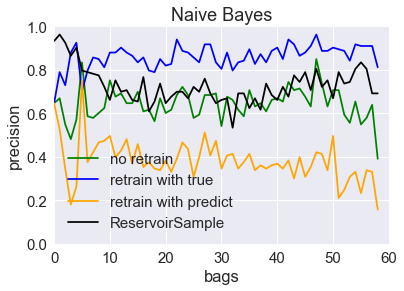

In [191]:
import matplotlib.pyplot as plt
no_retrain_line,           = plt.plot(list(range(len(nb_res_0))), nb_res_0, label = 'no retrain', color = 'green')
retrain_with_true_line,    = plt.plot(list(range(len(nb_res_1))), nb_res_1, label = 'retrain with true', color = 'blue')
retrain_with_predict_line, = plt.plot(list(range(len(nb_res_2))), nb_res_2, label = 'retrain with predict', color = 'orange')
ReservoirSample_line,      = plt.plot(list(range(len(nb_res_3))), nb_res_3, label = 'ReservoirSample', color = 'black')
plt.title("Naive Bayes")
plt.xlim(0, partition)
plt.ylim(0,1)
plt.ylabel("precision")
plt.xlabel('bags')
plt.legend(handles = [no_retrain_line, retrain_with_true_line, retrain_with_predict_line, ReservoirSample_line])
plt.show()

In [152]:
Counter(y2[:len(nb_time_2)])

Counter({0: 2260, 1: 1383, 2: 3230, 3: 386, 4: 588})

In [151]:
confusion_matrix(y2[:len(nb_time_2)], nb_time_2)

array([[2026,  213,   17,    3,    1],
       [1217,  155,   10,    0,    1],
       [2938,  284,    5,    2,    1],
       [ 342,   40,    2,    1,    1],
       [ 530,   53,    3,    1,    1]], dtype=int64)

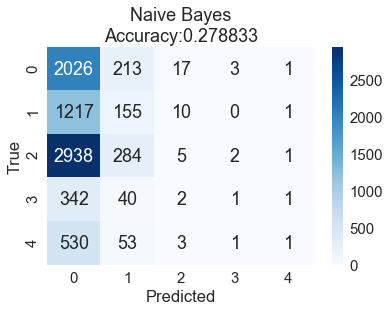

In [194]:
ShowBeautyConfusionMatrix(y2[:len(nb_time_2)], nb_time_2, "Naive Bayes")

In [66]:
partition = 60
svm_res_0, svm_time_0 = use_nbsvm_indiv(X2, y2, lambda: SGDClassifier(tol=1e-3), partition, 0)
svm_res_1, svm_time_1 = use_nbsvm_indiv(X2, y2, lambda: SGDClassifier(tol=1e-3), partition, 1)
svm_res_2, svm_time_2 = use_nbsvm_indiv(X2, y2, lambda: SGDClassifier(tol=1e-3), partition, 2)
svm_res_3, svm_time_3 = use_nbsvm_indiv(X2, y2, lambda: SGDClassifier(tol=1e-3), partition, 3)

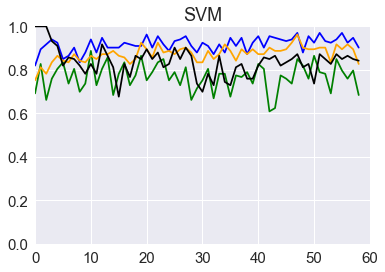

In [67]:
no_retrain_line           = plt.plot(list(range(len(svm_res_0))), svm_res_0, label = 'no retrain', color = 'green')
retrain_with_true_line    = plt.plot(list(range(len(svm_res_1))), svm_res_1, label = 'retrain with true', color = 'blue')
retrain_with_predict_line = plt.plot(list(range(len(svm_res_2))), svm_res_2, label = 'retrain with predict', color = 'orange')
ReservoirSample_line      = plt.plot(list(range(len(svm_res_3))), svm_res_3, label = 'ReservoirSample', color = 'black')
plt.title("SVM")
plt.xlim(0, partition)
plt.ylim(0,1)
#plt.legend(handles = [no_retrain_line, retrain_with_true_line, retrain_with_predict_line, ReservoirSample_line])
plt.show()

### Softmax Regression

In [391]:
import time

def use_soft_indiv(data, categ, partition=60, retrain = 0):
    # retrain = 0: no retrain
    #           1: use true to retrain
    #           2: use predict to retrain
    #           3: reservoir
    predicts = []
    predicts_categ = []
    times = []
    size = len(data)//partition
    first_size = size*1
    pred_categ = categ[0:first_size]
    sample_categ = categ[0:first_size]
    sample_data  = data[0:first_size]
    for j in range(0, len(data)-size*2, size):
        start_time = time.time()
        j1 = j+size
        j2 = j+2*size
        if retrain == 1:
            T,V,_ = tfidf(data[0:j1], data[j1:j2])
            rate, preds, _ = main(T, categ[0:j1], V, categ[j1:j2], 0, 365, 0.01)
        elif retrain == 2:
            T,V,_ = tfidf(data[0:j1], data[j1:j2])
            rate, preds, _ = main(T, pred_categ[0:j1], V, categ[j1:j2], 0, 365, 0.01)
            if j >= len(pred_categ) - size:
                pred_categ.extend(preds)
        elif retrain == 3:
            # number of bags
            if j//size < 10:
                T,V,_ = tfidf(data[0:j1], data[j1:j2])
                rate, preds, _ = main(T, categ[0:j1], V, categ[j1:j2], 0, 365, 0.01)
                sample_data = data[0:j2]
                if j >= len(pred_categ) - size*1:
                    sample_categ.extend(preds)
            else:
                T,V,_ = tfidf(sample_data, data[j1:j2])
                rate, preds, _ = main(T, sample_categ, V, categ[j1:j2], 0, 365, 0.01)
                sample_data, sample_categ = ReservoirSample(sample_data, sample_categ, data[j1:j2], preds)
        else:
            T,V,_ = tfidf(data[0:first_size], data[j1:j2])
            rate, preds, _ = main(T, categ[0:first_size], V, categ[j1:j2], 0, 365, 0.01)
        predicts.append(rate)
        predicts_categ.extend(preds)
        end_time = time.time()
        times.append(end_time-start_time)
    return predicts, predicts_categ, times

In [392]:
partition = 100
sf_res_0, sf_res_categ_0, sf_time_0 = use_soft_indiv(X2, y2, partition, 0)
sf_res_1, sf_res_categ_1, sf_time_1 = use_soft_indiv(X2, y2, partition, 1)
sf_res_2, sf_res_categ_2, sf_time_2 = use_soft_indiv(X2, y2, partition, 2)
sf_res_3, sf_res_categ_3, sf_time_3 = use_soft_indiv(X2, y2, partition, 3)

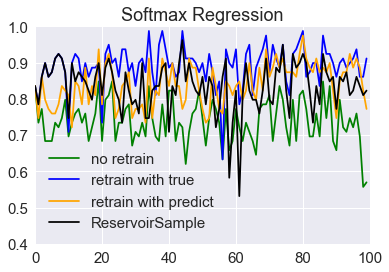

In [393]:
no_retrain_line,           = plt.plot(list(range(len(sf_res_0))), sf_res_0, label = 'no retrain', color = 'green')
retrain_with_true_line,    = plt.plot(list(range(len(sf_res_1))), sf_res_1, label = 'retrain with true', color = 'blue')
retrain_with_predict_line, = plt.plot(list(range(len(sf_res_2))), sf_res_2, label = 'retrain with predict', color = 'orange')
ReservoirSample_line,      = plt.plot(list(range(len(sf_res_3))), sf_res_3, label = 'ReservoirSample', color = 'black')
plt.title("Softmax Regression")
plt.xlim(0, partition)
plt.ylim(0.4,1)
plt.legend(handles = [no_retrain_line, retrain_with_true_line, retrain_with_predict_line, ReservoirSample_line])
plt.show()

In [410]:
np.mean(sf_res_0)

0.73696202531645549

In [411]:
np.mean(sf_res_1)

0.89012658227848096

In [412]:
np.mean(sf_res_2)

0.83949367088607585

In [413]:
np.mean(sf_res_3)

0.83468354430379743

### Shuffled

In [414]:
X3 = X2
y3 = y2
import random
random.seed(5220)
rindexes = random.sample(range(len(X2)), len(X2))
X3 = [X2[i] for i in rindexes]
y3 = [y2[i] for i in rindexes]

In [415]:
partition = 100
rsf_res_0, rsf_res_categ_0, rsf_time_0 = use_soft_indiv(X3, y3, partition, 0)
rsf_res_1, rsf_res_categ_1, rsf_time_1 = use_soft_indiv(X3, y3, partition, 1)
rsf_res_2, rsf_res_categ_2, rsf_time_2 = use_soft_indiv(X3, y3, partition, 2)
rsf_res_3, rsf_res_categ_3, rsf_time_3 = use_soft_indiv(X3, y3, partition, 3)

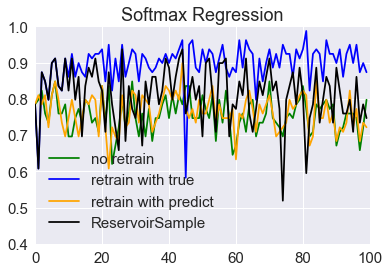

In [416]:
no_retrain_line,           = plt.plot(list(range(len(rsf_res_0))), rsf_res_0, label = 'no retrain', color = 'green')
retrain_with_true_line,    = plt.plot(list(range(len(rsf_res_1))), rsf_res_1, label = 'retrain with true', color = 'blue')
retrain_with_predict_line, = plt.plot(list(range(len(rsf_res_2))), rsf_res_2, label = 'retrain with predict', color = 'orange')
ReservoirSample_line,      = plt.plot(list(range(len(rsf_res_3))), rsf_res_3, label = 'ReservoirSample', color = 'black')
plt.title("Softmax Regression")
plt.xlim(0, partition)
plt.ylim(0.4,1)
plt.legend(handles = [no_retrain_line, retrain_with_true_line, retrain_with_predict_line, ReservoirSample_line])
plt.show()

In [18]:
partition = 60
rnb_res_0, rnb_time_0 = use_nbsvm_indiv(X3, y3, lambda: MultinomialNB(), partition, 0)
rnb_res_1, rnb_time_1 = use_nbsvm_indiv(X3, y3, lambda: MultinomialNB(), partition, 1)
rnb_res_2, rnb_time_2 = use_nbsvm_indiv(X3, y3, lambda: MultinomialNB(), partition, 2)
rnb_res_3, rnb_time_3 = use_nbsvm_indiv(X3, y3, lambda: MultinomialNB(), partition, 3)

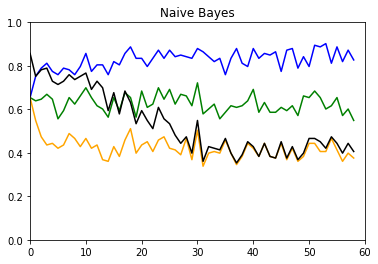

In [19]:
no_retrain_line           = plt.plot(list(range(len(rnb_res_0))), rnb_res_0, label = 'no retrain', color = 'green')
retrain_with_true_line    = plt.plot(list(range(len(rnb_res_1))), rnb_res_1, label = 'retrain with true', color = 'blue')
retrain_with_predict_line = plt.plot(list(range(len(rnb_res_2))), rnb_res_2, label = 'retrain with predict', color = 'orange')
ReservoirSample_line      = plt.plot(list(range(len(rnb_res_3))), rnb_res_3, label = 'ReservoirSample', color = 'black')
plt.title("Naive Bayes")
plt.xlim(0, partition)
plt.ylim(0,1)
#plt.legend(handles = [no_retrain_line, retrain_with_true_line, retrain_with_predict_line, ReservoirSample_line])
plt.show()

In [ ]:
confusion_matrix()

In [25]:
partition = 100
rsvm_res_0, rsvm_time_0 = use_nbsvm_indiv(X3, y3, lambda: SGDClassifier(tol=1e-3), partition, 0)
rsvm_res_1, rsvm_time_1 = use_nbsvm_indiv(X3, y3, lambda: SGDClassifier(tol=1e-3), partition, 1)
rsvm_res_2, rsvm_time_2 = use_nbsvm_indiv(X3, y3, lambda: SGDClassifier(tol=1e-3), partition, 2)
rsvm_res_3, rsvm_time_3 = use_nbsvm_indiv(X3, y3, lambda: SGDClassifier(tol=1e-3), partition, 3)

KeyboardInterrupt: 

In [ ]:
no_retrain_line           = plt.plot(list(range(len(rsvm_res_0))), rsvm_res_0, label = 'no retrain', color = 'green')
retrain_with_true_line    = plt.plot(list(range(len(rsvm_res_1))), rsvm_res_1, label = 'retrain with true', color = 'blue')
retrain_with_predict_line = plt.plot(list(range(len(rsvm_res_2))), rsvm_res_2, label = 'retrain with predict', color = 'orange')
ReservoirSample_line      = plt.plot(list(range(len(rsvm_res_3))), rsvm_res_3, label = 'ReservoirSample', color = 'black')
plt.title("SVM")
plt.xlim(0, partition)
plt.ylim(0,1)
#plt.legend(handles = [no_retrain_line, retrain_with_true_line, retrain_with_predict_line, ReservoirSample_line])
plt.show()

In [ ]:
partition = 60
rsf_res_0, rsf_time_0 = use_soft_indiv(X3, y3, partition, 0)
rsf_res_1, rsf_time_1 = use_soft_indiv(X3, y3, partition, 1)
rsf_res_2, rsf_time_2 = use_soft_indiv(X3, y3, partition, 2)
rsf_res_3, rsf_time_3 = use_soft_indiv(X3, y3, partition, 3)

In [ ]:
no_retrain_line           = plt.plot(list(range(len(rsf_res_0))), rsf_res_0, label = 'no retrain', color = 'green')
retrain_with_true_line    = plt.plot(list(range(len(rsf_res_1))), rsf_res_1, label = 'retrain with true', color = 'blue')
retrain_with_predict_line = plt.plot(list(range(len(rsf_res_2))), rsf_res_2, label = 'retrain with predict', color = 'orange')
ReservoirSample_line      = plt.plot(list(range(len(rsf_res_3))), rsf_res_3, label = 'ReservoirSample', color = 'black')
plt.title("Softmax Regression")
plt.xlim(0, partition)
plt.ylim(0,1)
#plt.legend(handles = [no_retrain_line, retrain_with_true_line, retrain_with_predict_line, ReservoirSample_line])
plt.show()

3